In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [3]:
n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [7]:
print(tf.zeros([1,n_neurons], dtype=tf.float32))

Tensor("zeros_4:0", shape=(1, 5), dtype=float32)


In [10]:
X0_batch = np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0,Y1],feed_dict={X0:X0_batch,X1:X1_batch})

In [11]:
print(Y0_val)

[[ 0.53527904 -0.7801097   0.99917835  0.9999551  -0.9973535 ]
 [ 0.9979545  -0.99998546  1.          1.         -0.99999994]
 [ 0.9999931  -1.          1.          1.         -1.        ]
 [ 0.98748666 -1.          0.9998956  -0.19677383  0.99998575]]


In [12]:
print(Y1_val)

[[ 0.9998909  -1.          1.          1.         -1.        ]
 [-0.9982196  -0.58049047 -0.9797753   0.58477837  0.97000945]
 [ 0.9183463  -1.          1.          1.         -0.99996734]
 [ 0.9613731  -0.99805534  0.9757972   0.67540765 -0.9085355 ]]


In [13]:
X0_batch

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [9, 0, 1]])

In [14]:
print("using tensorflow rnn functionality")

using tensorflow rnn functionality


In [21]:
n_inputs = 3
n_neurons = 5

In [26]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, 
                                                [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs
init = tf.global_variables_initializer()

In [28]:
X0_batch = np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0,Y1],feed_dict={X0: X0_batch, X1:X1_batch})

In [29]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.99122757, -0.9542541 , -0.7518079 , -0.9995208 ,  0.9820235 ],
       [ 0.9999268 , -0.99783254, -0.8247353 , -0.9999963 ,  0.99947774],
       [ 0.996771  , -0.68750614,  0.8419969 ,  0.9303911 ,  0.8120684 ]],
      dtype=float32)

In [30]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [31]:
show_graph(tf.get_default_graph())

In [18]:
print("simplify it...")

simplify it...


In [32]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [34]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1,0,2]))
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1,0,2])

In [35]:
init = tf.global_variables_initializer()

In [39]:
X_batch = np.array([
    [[0,1,2,],[9,8,7]],
    [[3,4,5],[0,0,0]],
    [[6,7,8],[6,5,4]],
    [[9,0,1],[3,2,1]]
])
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [40]:
print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.9428799  -0.9998869   0.94055814  0.9999985  -0.9999997 ]]

 [[-0.8001535  -0.9921827   0.7817797   0.9971032  -0.9964609 ]
  [-0.637116    0.11300927  0.5798437   0.4310559  -0.6371699 ]]

 [[-0.93605185 -0.9998379   0.9308867   0.9999815  -0.99998295]
  [-0.9165386  -0.9945604   0.896054    0.99987197 -0.9999751 ]]

 [[ 0.9927369  -0.9981933  -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746338 -0.73191994  0.7827872   0.9525682  -0.9781773 ]]]


In [41]:
print("dynamic")

dynamic


In [42]:
print("training a sequence classifier")

training a sequence classifier


In [48]:
reset_graph()

In [49]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [50]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [51]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "train accuracy:", acc_train, "test accuracy:", acc_test)

0 train accuracy: 0.92 test accuracy: 0.9272
1 train accuracy: 0.97333336 test accuracy: 0.9524
2 train accuracy: 0.9266667 test accuracy: 0.9592
3 train accuracy: 0.9533333 test accuracy: 0.9617
4 train accuracy: 0.96666664 test accuracy: 0.9594
5 train accuracy: 0.96666664 test accuracy: 0.9689
6 train accuracy: 0.98 test accuracy: 0.9701
7 train accuracy: 0.96 test accuracy: 0.967
8 train accuracy: 0.96 test accuracy: 0.969
9 train accuracy: 0.97333336 test accuracy: 0.9686
10 train accuracy: 0.9866667 test accuracy: 0.964
11 train accuracy: 0.9533333 test accuracy: 0.966
12 train accuracy: 0.9866667 test accuracy: 0.9738
13 train accuracy: 0.97333336 test accuracy: 0.969
14 train accuracy: 0.97333336 test accuracy: 0.9726
15 train accuracy: 0.99333334 test accuracy: 0.9697
16 train accuracy: 0.99333334 test accuracy: 0.9738
17 train accuracy: 0.97333336 test accuracy: 0.9709
18 train accuracy: 0.97333336 test accuracy: 0.9698
19 train accuracy: 0.9866667 test accuracy: 0.9742
20 tr

KeyboardInterrupt: 

In [52]:
print("training to predict time series")

training to predict time series


In [14]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1)  * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

No handles with labels found to put in legend.


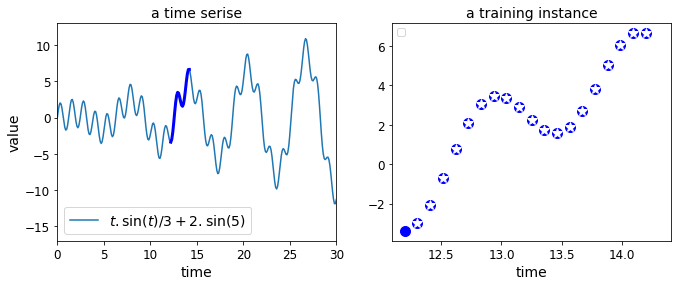

In [12]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("a time serise", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("time")
plt.ylabel("value")

plt.subplot(122)
plt.title("a training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="")
plt.legend(loc="upper left")
plt.xlabel("time")

plt.show()

In [15]:
X_batch, y_batch = next_batch(1, n_steps)

In [16]:
np.c_[X_batch[0], y_batch[0]]

array([[10.89441309, 10.5156565 ],
       [10.5156565 ,  9.64584171],
       [ 9.64584171,  8.46901585],
       [ 8.46901585,  7.22352   ],
       [ 7.22352   ,  6.14398192],
       [ 6.14398192,  5.404428  ],
       [ 5.404428  ,  5.07643841],
       [ 5.07643841,  5.1125844 ],
       [ 5.1125844 ,  5.35919447],
       [ 5.35919447,  5.59531355],
       [ 5.59531355,  5.58830444],
       [ 5.58830444,  5.1524642 ],
       [ 5.1524642 ,  4.19628863],
       [ 4.19628863,  2.74679542],
       [ 2.74679542,  0.94493245],
       [ 0.94493245, -0.98682443],
       [-0.98682443, -2.79677172],
       [-2.79677172, -4.26339312],
       [-4.26339312, -5.24736433],
       [-5.24736433, -5.72343758]])

In [17]:
reset_graph()

In [18]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)